University of Helsinki, Master's Programme in Data Science  
DATA20019 Trustworthy Machine Learning, Autumn 2021  
Antti Honkela and Ossi Räisä  

# Project 1: Local differential privacy for privacy-preserving data analysis

Deadline for returning the solutions: 14 November 23:55.

Python is recommended for solving the problems and it is supported by the course. If you wish, you can use R, but we cannot guarantee support for technical problems in R.

## General instructions (IMPORTANT!)

1. This is an individual project. You can discuss the solutions with other students, but everyone needs to write their own code and answers.
2. Please return your solutions as a notebook. When returning your solutions, please leave all output in the notebook.
3. When returning your solutions, please make sure the notebook can be run cleanly using "Cell" / "Run All".
4. Please make sure there are no dependencies between solutions to different problems.
5. Please make sure that your notebook will not depend on any local files.
6. Please make sure that the solutions for each problem in your notebook will produce the same results when run multiple times, i.e. remember to seed any random number generators you use (`numpy.random.seed()`!).


## Background on local differential privacy (LDP)

All problems in this project are about local differential privacy (LDP). LDP is a special case of differential privacy where the data set consists only of data from a single user.

A typical LDP algorithm works as follows:
1. Each user has some local data $x$.
2. The user applies a local randomiser $\mathcal{M}(x)$ to their data to obtain a noisy version $z = \mathcal{M}(x)$. The local randomiser must satisfy DP. The noisy $z$ can then be shared with a central aggregator.
3. The aggregator collects $z$ values from multiple users and analyses then jointly to make inferences on statistical properties of $x$ over the population of participating users.


## Task 1: Do you use illegal drugs?

Let us consider the so-called "randomised response" mechanism for collecting responses to a potentially embarrassing or private question. In this mechanism, the respondents are instructed to as follows:

1. Flip a coin.
2. If **tails**, then respond truthfully.
3. If **heads**, then flip a second coin and respond *Yes* if heads and *No* if tails.

i. Calculate analytically the probability of the randomised response being "yes" and the probability of the randomised response being "no", conditional to true response being "yes"/"no".

ii. Prove that this mechanism satisfies local $\epsilon$-DP with $\epsilon = \ln 3$.

iii. Assuming a population of independent respondents who have the probability $\pi$ to answer yes. Design a method to estimate $\pi$ from the noisy responses. Simulate the mechanism with $n$ participants for $n = 10, 100, 1000, 10000$ with $\pi = 0.01, 0.1$. How accurately can you estimate $\pi$ in the different cases? 

Hint: You can write the expected number of positive responses as a function of $\pi$ using the result of task i above. Setting this equal to the number of observed positive responses allows you to solve for an estimate of $\pi$.


### Answers

#### Question I

As also stated in the course slides:
- The probability that, given the true response to be "Yes", the random response is "Yes" is $\frac{3}{4}$, and the same applies to both the variables equals to "No"
- The probability that, given the true response to be "No", the random response is "Yes" is $\frac{1}{4}$, and the same applies to the vice versa

Formally, we can define:
- _R_ to be the random response, with values "No" or "Yes"
- _T_ to be the true response, with values "No" or "Yes"

Then the probabilities we are searching for are:
- $P(R="Yes"\mid T="Yes")=P(R="No"\mid T="No")=\frac{1}{2}+\frac{1}{2}\cdot\frac{1}{2}=\frac{3}{4}$
- $P(R="No"\mid T="Yes")=P(R="Yes"\mid T="No")=\frac{1}{2}\cdot\frac{1}{2}=\frac{1}{4}$

#### Question II

In order to prove that this mechanism satisfies local $\epsilon-DP$ with $\epsilon=ln3$ we must show that $$\frac{Pr(\mathcal{M}(\mathcal{D})\ =\ "Yes")}{Pr(\mathcal{M}(\mathcal{D'})\ =\ "Yes")} \leq e^{ln3}$$
That is $$\frac{3/4}{1/4} = 3 = e^{ln3}$$ and thus the machanism satisfies $\epsilon-DP$.

#### Question III

In [20]:
import numpy as np

# Note: 0 = tails, 1 = head
np.random.seed(0)
def simulate(pi, n):
    rand_yes = 0
    for i in range(0,n):
        t_answer = np.random.choice([0,1], p=[1-pi,pi]) # choose true answer with probability pi for yes and 1-pi for no
        if np.random.choice([0,1], p=[0.5,0.5]) == 0: # throw coin
            if t_answer==1:
                rand_yes+=1
        else: #rethrow coin
            if np.random.choice([0,1], p=[0.5,0.5]) == 1:
                rand_yes+=1
    return rand_yes/n # return probability

print('N\tP\tEstimated')
print("10\t0.01\t", simulate(0.01, 10))
print("100\t0.01\t", simulate(0.01, 100))
print("1000\t0.01\t", simulate(0.01, 1000))
print("10000\t0.01\t", simulate(0.01, 10000))
print("10\t0.1\t", simulate(0.1, 10))
print("100\t0.1\t", simulate(0.1, 100))
print("1000\t0.1\t", simulate(0.1, 1000))
print("10000\t0.1\t", simulate(0.1, 10000))


N	P	Estimated
10	0.01	 0.3
100	0.01	 0.2
1000	0.01	 0.25
10000	0.01	 0.2449
10	0.1	 0.2
100	0.1	 0.37
1000	0.1	 0.303
10000	0.1	 0.298


## Task 2: Generalising randomised response

Consider a generalised randomised response mechanism, where each person flips $k$ coins in step 1 and responds truthfully if either  
i. all of them display tails  
ii. any one of them displays tails.

In all other cases the participant would flip another coin to choose a random answer.

Verify that both of these produce $\epsilon$-DP mechanisms for each $k$. Evaluate and plot $\epsilon$ as a function of $k$ for each case and $k = 1, \dots, 10$.

Hint: you cannot show that something is $\epsilon$-DP empirically, only analytically.

### Answers

#### Case I

Using the same notation of the previous exercise, the probability $P(R="Yes"|T="Yes")$ for $k$ responses in which all of them display tails can be calculated with the following formula: $$P(R="Yes"|T="Yes")=\left (\frac{1}{2}\right )^k+\left (\frac{2^k-1}{2^k}\right )\cdot\left (\frac{1}{2}\right )$$
And, obviously, the probability $P(R="Yes"|T="No")$ is the complementary of $P(R="Yes"|T="Yes")$.

The following code calculates the different $\epsilon$ for the different $k$ and plots them. It is clear that this case produces an $\epsilon$-DP mechanism, and to be more precise, the more the flips the more is the privacy level achieved.

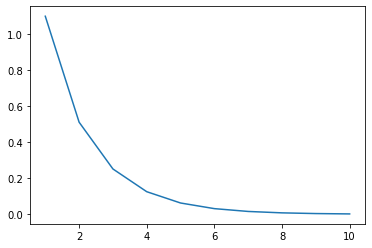

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Note: 0 = tails, 1 = heads
np.random.seed(0)
def calculate_eps(k): # calculate epsilon with the formula reported above
    yy = 1/(2**k) + ((2**k-1)/2**k * (1/2))
    yn = 1 - yy
    epsilon = np.log(yy/yn)
    return epsilon
    
def compute_x_y(): # build x and y for the graph
    x = []
    y = []
    for i in range(1,11):
        x.append(i)
        y.append(calculate_eps(i))
    return x, y

x, y = compute_x_y()
plt.plot(x,y)
plt.show()       

#### Case II

The probability $P(R="Yes"|T="Yes")$ for $k$ responses in which any of them display tails can be calculated with the following formula: $$P(R="Yes"|T="Yes")=\left (\frac{1}{2}\right )^k\cdot(2^k-1)+\frac{1}{2}\cdot\left (\frac{1}{2} \right )^k$$
And, obviously, the probability $P(R="Yes"|T="No")$ is the complementary of $P(R="Yes"|T="Yes")$.

The following code calculates the different $\epsilon$ for the different $k$ and plots them. It is clear that this case produces an $\epsilon$-DP mechanism, and to be more precise, the more the flips the less is the privacy level achieved.

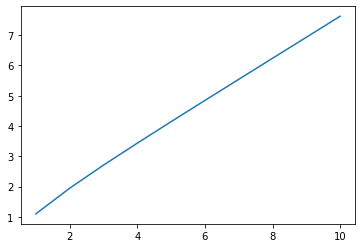

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Note: 0 = tails, 1 = heads
np.random.seed(0)
def calculate_eps(k):
    yy = (2**k-1)/2**k + (1/2**k)*(1/2)
    yn = 1 - yy
    epsilon = math.log(yy/yn)
    return epsilon
    
def compute_x_y():
    x = []
    y = []
    for i in range(1,11):
        x.append(i)
        y.append(calculate_eps(i))
    return x, y

x, y = compute_x_y()
plt.plot(x,y)
plt.show() 

## Task 3: How much money do you have on your bank account?

To answer a question about a scalar value, we need a different mechanism. Here we use the Laplace mechanism, which works as follows:

* Evaluate the *sensitivity* of the function $f$ of interest:
$$ \Delta f = \max\limits_{\mathcal{D} \sim \mathcal{D}'} | f(\mathcal{D}) - f(\mathcal{D}') |, $$
where $\mathcal{D} \sim \mathcal{D}'$ denotes pairs of data sets that differ by a single sample.
* Compute $\mathcal{M}(\mathcal{D}) = f(\mathcal{D}) + \frac{\Delta f}{\epsilon} \eta$
where $\eta \sim \operatorname{Laplace}(0, 1)$

In this exercise we apply the Laplace mechanism in locally differentially private (LDP) mode, i.e. each individual is assumed to form a different single-observation data set that is protected using this mechanism.

In order to estimate the mean of the distribution of data held by the users, we can use the following moment identities with $x$ denoting the user data and $z$ denoting the Laplace noise added for DP:
$$ \mathrm{E}[x + z] = \mathrm{E}[x] + \mathrm{E}[z], $$
$$ \mathrm{Var}[x + z] = \mathrm{Var}[x] + \mathrm{Var}[z]. $$

i) What is the probability $Pr(\mathcal{M}(\mathcal{D})=s)$ for some outcome $s$? Also, find the ratio $\frac{Pr(\mathcal{M}(\mathcal{D})=s)}{Pr(\mathcal{M}(\mathcal{D}')=s)}$.

ii) (Optional) Verify that this mechanism satisfies $\epsilon$-DP.

iii) Assuming a population of independent respondents whose bank account balances follow the exponential distribution $\mathrm{Exp}(\lambda)$ with $\lambda = 1/5000$. Simulate the mechanism for $n$ participants with $n = 10, 100, 1000, 10000$. How accurately can you estimate the mean and the standard deviation of the bank account balance distribution, when using DP with $\epsilon = 0.1$ (very strong privacy), $\epsilon = 1$ (moderately strong privacy) and $\epsilon = 10$ (very weak privacy)?
Repeat each simulation 100 times to get an idea of the accuracy.

Hint: you will need to set an upper bound on the allowed balances to get a bounded sensitivity. Larger values can be handled e.g. by setting them to the maximum. In order to guarantee DP, this bound should be selected independently of the actual data at hand. (Mechanisms that do not require such an a priori bound exist, but are more complicated. If you are interested, see e.g. https://dl.acm.org/citation.cfm?id=1250803.)


### Answer

#### Question I

The probability $Pr(\mathcal{M}(\mathcal{D})=s)$ can be calculated considering $\mathcal{M}(\mathcal{D}) = f(\mathcal{D}) + \frac{\Delta f}{\epsilon} \eta$, so $$Pr(\mathcal{M}(\mathcal{D})=s) = Pr(f(\mathcal{D}) + \frac{\Delta f}{\epsilon} \eta = s)$$ With simple algebric operations we get $$Pr(f(\mathcal{D}) + \frac{\Delta f}{\epsilon} \eta = s) = Pr(\eta = (s-f(\mathcal{D}))\cdot\frac{\epsilon}{\Delta f})$$
And then, since $\mu=0$ and $b=1$, $$Pr(\eta = (s-f(\mathcal{D}))\cdot\frac{\epsilon}{\Delta f}) = \frac{1}{2}\cdot e^{-\left |(s-f(\mathcal{D}))\cdot\frac{\epsilon}{\Delta f}\right |}$$
Finally, the ratio is $$\frac{\frac{1}{2}\cdot e^{-\left |(s-f(\mathcal{D}))\cdot\frac{\epsilon}{\Delta f}\right |}}{\frac{1}{2}\cdot e^{-\left |(s-f(\mathcal{D'}))\cdot\frac{\epsilon}{\Delta f}\right |}}$$ and so $$e^{-\left |(s-f(\mathcal{D}))\cdot\frac{\epsilon}{\Delta f}\right | + \left |(s-f(\mathcal{D'}))\cdot\frac{\epsilon}{\Delta f}\right |}$$

#### Question II

In order to prove that this mechanism satisfies $\epsilon$-DP, we can do further calulations. We then discover that $$e^{-\left |(s-f(\mathcal{D}))\cdot\frac{\epsilon}{\Delta f}\right | + \left |(s-f(\mathcal{D'}))\cdot\frac{\epsilon}{\Delta f}\right |} \leq e^{\left | (s-f(\mathcal{D'}))\cdot\frac{\epsilon}{\Delta f} - (s-f(\mathcal{D}))\cdot\frac{\epsilon}{\Delta f}\right |} \leq e^{\left | f(\mathcal{D})-f(\mathcal{D'}) \right |} \leq e^\epsilon$$

#### Question III

In [23]:
import numpy as np

np.random.seed(0)
def simulate(n, eps):
    dist = np.random.exponential(scale=5000, size=n) # create random distribution (exponential)
    data = np.clip(dist, 0, 20000) # clip data to upper bound = 20000 (arbitrary number in order to have bounded sensitivity)
    noise = np.random.laplace(loc=0, scale=1, size=n) # generate noise with Laplace(0,1)
    distorted = data + noise*(20000/eps) # add noise to data
    return np.mean(distorted), np.sqrt(np.var(distorted))-np.sqrt(np.var(data)+2) # return mean and variance

for e in [0.1, 1, 10]:
    print('Epsilon =', e)
    print("n\tmean\tstd")
    for n in [10, 100, 1000, 10000]:
        m = 0
        v = 0
        for j in range(0, 100):
            m1, v1 = simulate(n,e)
            m+=m1
            v+=v1
        m/=100
        v/=100
        print(n, '\t', int(m), '\t', int(v))


Epsilon = 0.1
n	mean	std
10 	 -2517 	 256336
100 	 2660 	 274463
1000 	 5168 	 277640
10000 	 5109 	 278678
Epsilon = 1
n	mean	std
10 	 4201 	 21394
100 	 4214 	 24196
1000 	 4842 	 23939
10000 	 4909 	 24051
Epsilon = 10
n	mean	std
10 	 4851 	 943
100 	 4903 	 837
1000 	 4886 	 796
10000 	 4911 	 800


## Task 4: Does your age affect your account balance?

We can apply the LDP Laplace mechanism to fit a linear regression model to model the bank account balance as a function of age. We know that the respondents are of age 20-70 years and their account balances are at most 150000.

Linear regression fit to scalar $x_i, y_i$ involves fitting the model
$$ y_i = \alpha + \beta x_i + \epsilon_i, $$
where $\beta$ is the regression coefficient and $\alpha$ is the intercept. Assuming regression errors $\epsilon_i$ are normally distributed, the maximum likelihood estimates of the parameters are
$$ \hat{\beta}= \frac{\sum_{i = 1}^n (x_i - \bar{x})(y_i - \bar{y}) }{ \sum_{i = 1}^n (x_i - \bar{x})^2} \\
   \hat{\alpha} = \bar{y} - \hat{\beta} \bar{x},$$
where $\bar{x} = \frac{1}{n} \sum_{i = 1}^n x_i$ and $\bar{y} = \frac{1}{n} \sum_{i = 1}^n y_i$.

i. Use the data in "balances.csv" loaded below, and release $x$ (the age) and $y$ (the bank account balance) using Laplace mechanism with total privacy loss $\epsilon=1$ and fit the regression model to the noisy data. Repeat the process 100 times and evaluate how the model compares with one learned from clean data. Because you are releasing the composition of two queries, you will need to use $\epsilon/2$ as the $\epsilon$ for each query to reach total privacy loss of $\epsilon$.

ii. Design a two-step protocol that first estimates the means $\bar{x}$ and $\bar{y}$, and then uses these to release the terms $(x_i - \bar{x}) (y_i - \bar{y})$, $(x_i - \bar{x})^2$ using the LDP Laplace mechanism. Fit the regression model using the noisy information. Compare with the above. In order to make the results comparable, the total privacy loss should be $\epsilon=1$. Because you are releasing the composition of four queries, you will need to use $\epsilon/4$ as the $\epsilon$ for each query to reach total privacy loss of $\epsilon$.

iii. Repeat the above cases with total privacy loss $\epsilon = 10$ and compare the results.

iv. Compare your results for the two-step protocol with a version using central DP Laplace mechanism where the mechanism $\mathcal{M}(\mathcal{D})$ operates on the entire data set at the same time. (Hint: because the results depend only on *sums* over individuals, the sensitivity of the query is the same regardless the number of entries in the sum. Therefore in the central model you add the same amount of noise to the sum as in the local model you add to each term.)

Hint: you can use the known range of values of $x$ and $y$ to bound the sensitivites. For the two-step protocol, you can also use the published private means $\bar{x}$ and $\bar{y}$ to evaluate the sensitivity for the second step, as long as you do not use any other features of the specific data set.

Comment: a better solution would take into account the knowledge of the noise added. Developing algorithms like this is in many cases still an open research problem. Furthermore, the privacy budget can be split between different queries arbitrarily, not necessarily evenly like here.

### Answer

#### Question I and III

In [24]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://www.cs.helsinki.fi/u/ahonkela/teaching/tml/balances.csv', header=0, index_col=0)

x = data.values[:,0]
y = data.values[:,1]
N = len(data)

# Parameters
div_eps = 2
min_x = 20
max_x = 70
min_y = 0
max_y = 150000
sens_x = max_x - min_x
sens_y = max_y - min_y

np.random.seed(0)
def apply_noise(x, y, eps): # apply noise to both x and y
    x = np.clip(x, min_x, max_x) # clip x (not needed in theory, it should be already clipped, just to be sure)
    y = np.clip(y, min_y, max_y) # same
    noise_x = npr.laplace(size=N) # generate noise
    noise_y = npr.laplace(size=N)
    return x+noise_x*(sens_x/(eps/div_eps)), y+noise_y*(sens_y/(eps/div_eps)) # return distorted data

def linear_regression(x,y): # compute simple linear regression (beta and alpha)
    beta = np.sum((x-np.average(x))*(y - np.average(y))/np.sum((x-np.average(x))**2))
    alpha = np.average(y) - beta*np.average(x)    
    return beta, alpha

beta_orig, alpha_orig = linear_regression(x,y)
beta_noise = 0
alpha_noise = 0

In [25]:
# if repeat 100 times is intended to be the mean of beta and alpha

for eps in [1,10]:
    for i in range(0,100):
        x_noise, y_noise = apply_noise(x,y,eps)
        b1, a1 = linear_regression(x_noise, y_noise)
        beta_noise+=b1
        alpha_noise+=a1

    beta_noise/=100
    alpha_noise/=100
    print('Epsilon =', eps)
    print('beta_orig\t\tbeta_noise')
    print(beta_orig, '\t', beta_noise)
    print('alpha_orig\t\talpha_noise')
    print(alpha_orig, '\t', alpha_noise,'\n')

Epsilon = 1
beta_orig		beta_noise
1146.959011527517 	 8.696378503991358
alpha_orig		alpha_noise
-1776.3642287172843 	 48920.767289936586 

Epsilon = 10
beta_orig		beta_noise
1146.959011527517 	 565.8971284574019
alpha_orig		alpha_noise
-1776.3642287172843 	 24596.172541677683 



Epsilon = 1
Betas


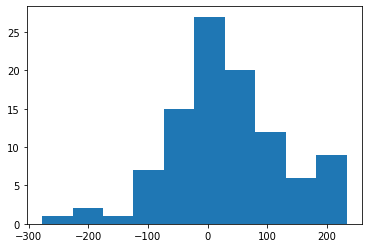

Alphas


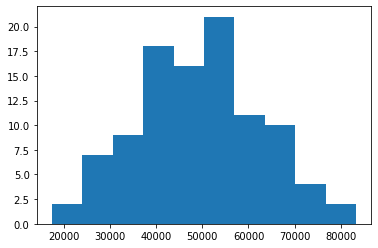

Epsilon = 10
Betas


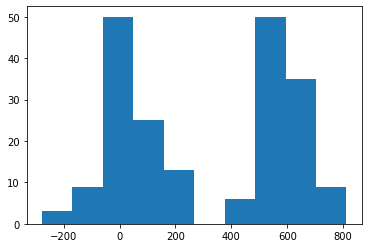

Alphas


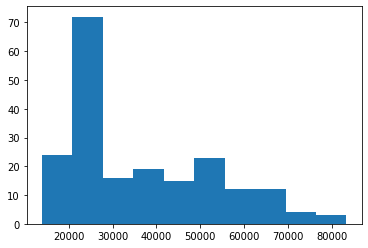

In [26]:
# if repeat 100 time is intended repeat 100 time and print everything
import matplotlib.pyplot as plt

beta_noises = []
alpha_noises = []

for eps in [1,10]:
    for i in range(0,100):
        x_noise, y_noise = apply_noise(x,y,eps)
        b1, a1 = linear_regression(x_noise, y_noise)
        beta_noises.append(b1)
        alpha_noises.append(a1)
    print('Epsilon =', eps)
    print('Betas')
    plt.hist(beta_noises)
    plt.show()
    print('Alphas')
    plt.hist(alpha_noises)
    plt.show()



#### Question II and III

In [27]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://www.cs.helsinki.fi/u/ahonkela/teaching/tml/balances.csv', header=0, index_col=0)

x = data.values[:,0]
y = data.values[:,1]
N = len(data)

# Parameters
div_eps = 4
min_x = 20
max_x = 70
min_y = 0
max_y = 150000
sens_x = max_x - min_x 
sens_y = max_y - min_y 

np.random.seed(0)
def apply_noise(x, y, eps):
    x = np.clip(x, min_x, max_x)
    y = np.clip(y, min_y, max_y)
    noise_x = npr.laplace(size=N)
    noise_y = npr.laplace(size=N)
    return x+noise_x*(sens_x/(eps/div_eps)), y+noise_y*(sens_y/(eps/div_eps))

def estimate_means(x, y, eps):
    noise_x = npr.laplace(size=N)
    noise_y = npr.laplace(size=N)
    x+=noise_x*(sens_x/(eps/div_eps))
    y+=noise_y*(sens_y/(eps/div_eps))
    return np.average(x), np.average(y)

def modif_linear_regression(x,y, eps):
    avg_x, avg_y = estimate_means(x,y,eps)
    beta = np.sum((x-avg_x)*(y-avg_y))/np.sum((x-avg_x)**2)
    alpha = avg_y-beta*avg_x
    return beta, alpha


In [28]:
# if repeat 100 times is intended be the mean of beta and alpha
beta_noise = 0
alpha_noise = 0

for eps in [1,10]:
    for i in range(0,100):
        x_noise, y_noise = apply_noise(x,y,eps)
        b1, a1 = modif_linear_regression(x_noise, y_noise, eps)
        beta_noise+=b1
        alpha_noise+=a1

    beta_noise/=100
    alpha_noise/=100
    print('Epsilon =', eps)
    print('beta_noise\t\talpha_noise')
    print(beta_noise,'\t',alpha_noise,'\n')

Epsilon = 1
beta_noise		alpha_noise
-27.709454980448253 	 44332.450316057206 

Epsilon = 10
beta_noise		alpha_noise
138.34319778123904 	 44547.344393899555 



Epsilon = 1
Betas


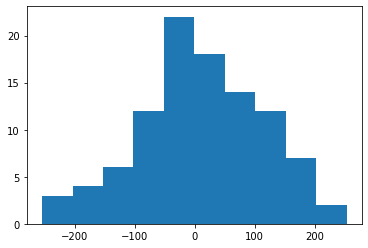

Alphas


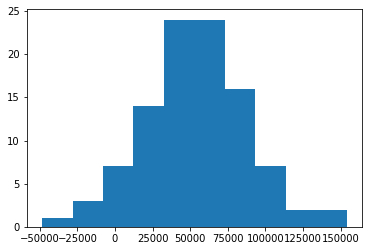

Epsilon = 10
Betas


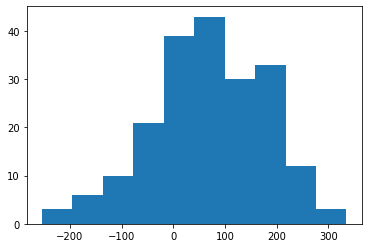

Alphas


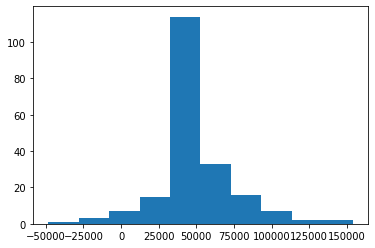

In [29]:
# if repeat 100 time is intended repeat 100 time and print everything
import matplotlib.pyplot as plt

beta_noises = []
alpha_noises = []

for eps in [1,10]:
    for i in range(0,100):
        x_noise, y_noise = apply_noise(x,y,eps)
        b1, a1 = modif_linear_regression(x_noise, y_noise, eps)
        beta_noises.append(b1)
        alpha_noises.append(a1)
    print('Epsilon =', eps)
    print('Betas')
    plt.hist(beta_noises)
    plt.show()
    print('Alphas')
    plt.hist(alpha_noises)
    plt.show()

#### Question IV

In [32]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://www.cs.helsinki.fi/u/ahonkela/teaching/tml/balances.csv', header=0, index_col=0)

x = data.values[:,0]
y = data.values[:,1]
N = len(data)

# Parameters
div_eps = 4
min_x = 20
max_x = 70
min_y = 0
max_y = 150000
sens_x = max_x - min_x
sens_y = max_y - min_y

np.random.seed(0)
def apply_noise(x, y, eps):
    x = np.clip(x, min_x, max_x)
    y = np.clip(y, min_y, max_y)
    noise_x = npr.laplace(size=N)
    noise_y = npr.laplace(size=N)
    return x+noise_x*(sens_x/(eps/div_eps)), y+noise_y*(sens_y/(eps/div_eps))

def apply_final_noise(x, eps):
    noise = npr.laplace(size=1)
    return x+noise*(sens_x/(eps/div_eps))

def modif2_linear_regression(x,y, eps):
    avg_x, avg_y = np.average(x), np.average(y)
    beta = apply_final_noise(np.sum((x-avg_x)*(y-avg_y)),eps)/apply_final_noise(np.sum((x-avg_x)**2),eps)
    alpha = avg_y-beta*avg_x
    return beta, alpha



In [33]:
# if repeat 100 times is intended be the mean of beta and alpha
beta_noise = 0
alpha_noise = 0

for eps in [1,10]:
    for i in range(0,100):
        x_noise, y_noise = apply_noise(x,y,eps)
        b1, a1 = modif2_linear_regression(x_noise, y_noise, eps)
        beta_noise+=b1
        alpha_noise+=a1

    beta_noise/=100
    alpha_noise/=100
    print('Epsilon =', eps)
    print('beta_noise\t\talpha_noise')
    print(beta_noise,'\t',alpha_noise,'\n')

Epsilon = 1
beta_noise		alpha_noise
[-2.55112117] 	 [51515.8860631] 

Epsilon = 10
beta_noise		alpha_noise
[227.46524239] 	 [39588.31024616] 



Epsilon = 1
Betas


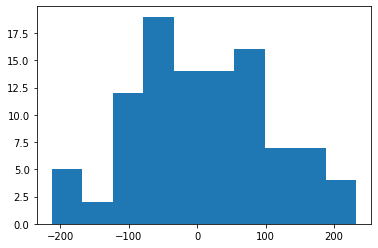

Alphas


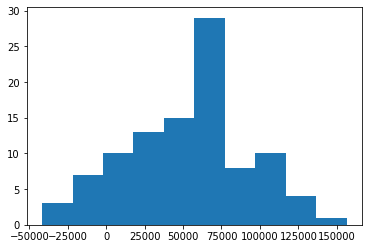

Epsilon = 10
Betas


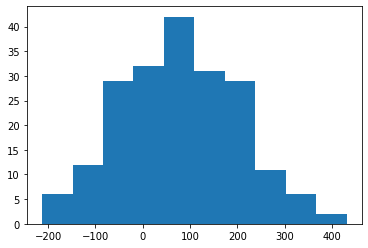

Alphas


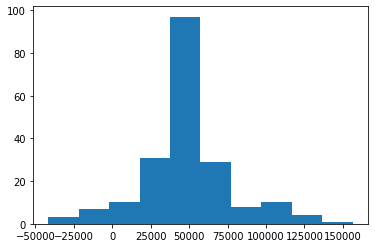

In [34]:
import matplotlib.pyplot as plt

beta_noises = []
alpha_noises = []

for eps in [1,10]:
    for i in range(0,100):
        x_noise, y_noise = apply_noise(x,y,eps)
        b1, a1 = modif_linear_regression(x_noise, y_noise, eps)
        beta_noises.append(b1)
        alpha_noises.append(a1)
    print('Epsilon =', eps)
    print('Betas')
    plt.hist(beta_noises)
    plt.show()
    print('Alphas')
    plt.hist(alpha_noises)
    plt.show()